In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
xls = pd.ExcelFile('online_retail_II.xlsx')
df1 = pd.read_excel(xls, 'Year 2009-2010')
df2 = pd.read_excel(xls, 'Year 2010-2011')

In [21]:
print(df1.shape)
print(df2.shape)

(525461, 8)
(541910, 8)


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [25]:
df1[df1['Invoice'].str.startswith('C', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [28]:
df2_df2[~df2['Invoice'].str.startswith('C', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [29]:
df1['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     3549
REGENCY CAKESTAND 3 TIER               2212
STRAWBERRY CERAMIC TRINKET BOX         1843
PACK OF 72 RETRO SPOT CAKE CASES       1466
ASSORTED COLOUR BIRD ORNAMENT          1457
                                       ... 
stock credited from royal yacht inc       1
VINTAGE METAL CAKE STAND CREAM            1
BLUE BAROQUE FLOCK CANDLE HOLDER          1
S/4 HEART CRYSTAL FRIDGE MAGNETS          1
dotcom email                              1
Name: count, Length: 4681, dtype: int64

In [32]:
df_all = pd.concat([df1, df2], ignore_index=True)
df_all.shape

(1067371, 8)

In [33]:
cancelled_mask = df_all['Invoice'].str.startswith('C', na=False)
df_cancelled = df_all[cancelled_mask]
df = df_all[~cancelled_mask]
print(df_cancelled.shape)
print(df.shape)

(19494, 8)
(1047877, 8)


In [34]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<Axes: xlabel='InvoiceDate', ylabel='Invoice'>

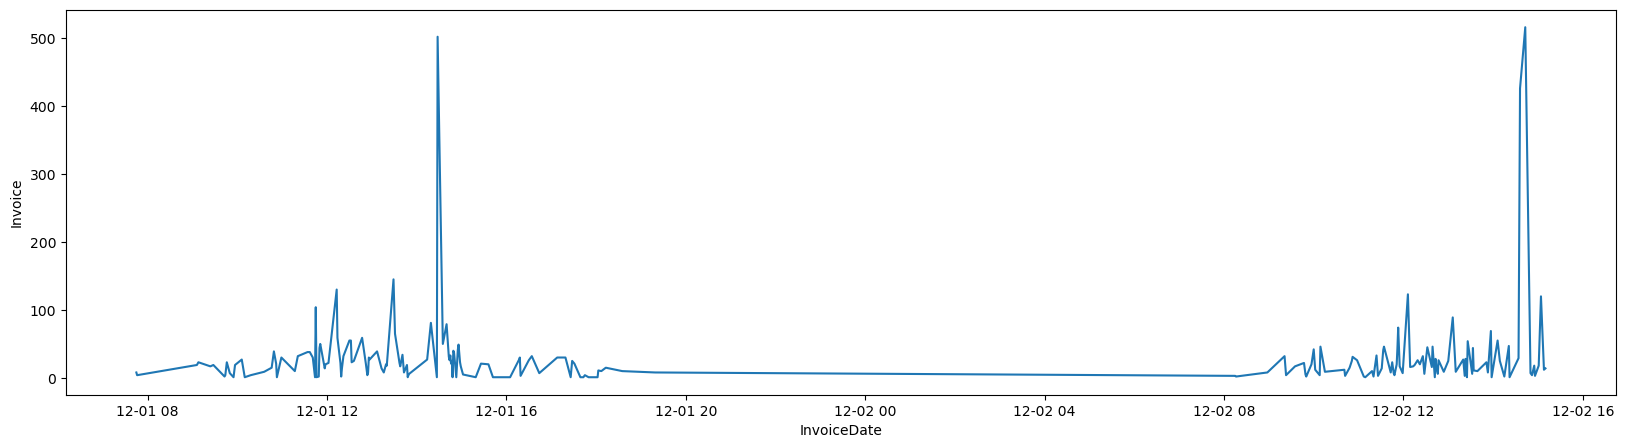

In [42]:
plt.figure(figsize=(20,5))
sns.lineplot(df.groupby('InvoiceDate').count().iloc[:200, :].reset_index(), x='InvoiceDate', y='Invoice')

In [51]:
df['Year'] = df['InvoiceDate'].dt.year.values
df['Month'] = df['InvoiceDate'].dt.month.values
df.head()

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_24616\4247056345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year.values
C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_24616\4247056345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month.values


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12


In [53]:
df.groupby(['Year', 'Month']).count().reset_index()

,Year,Month,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,2009,12,44213,44213,43985,44213,44213,44213,30761,44213
1,2010,1,30869,30869,30647,30869,30869,30869,21778,30869
2,2010,2,28812,28812,28302,28812,28812,28812,23369,28812
3,2010,3,40667,40667,40415,40667,40667,40667,32302,40667
4,2010,4,33431,33431,33321,33431,33431,33431,27238,33431
5,2010,5,34340,34340,33864,34340,34340,34340,28644,34340
6,2010,6,39190,39190,39015,39190,39190,39190,31191,39190
7,2010,7,32649,32649,32564,32649,32649,32649,27033,32649
8,2010,8,32733,32733,32574,32733,32733,32733,26393,32733
9,2010,9,41279,41279,41144,41279,41279,41279,34602,41279


In [62]:
df['year_month'] = pd.to_datetime(df.InvoiceDate).dt.strftime('%Y-%m')

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_24616\3727922683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = pd.to_datetime(df.InvoiceDate).dt.strftime('%Y-%m')


In [131]:
df_cancelled['year_month'] = pd.to_datetime(df_cancelled.InvoiceDate).dt.strftime('%Y-%m')
df_cancelled['Quantity'] = -1 * df_cancelled['Quantity']

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_24616\46423772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancelled['year_month'] = pd.to_datetime(df_cancelled.InvoiceDate).dt.strftime('%Y-%m')
C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_24616\46423772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancelled['Quantity'] = -1 * df_cancelled['Quantity']


In [64]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,2009-12


In [132]:
df = df[df['Quantity'] >= 0]

<Axes: xlabel='year_month', ylabel='Quantity'>

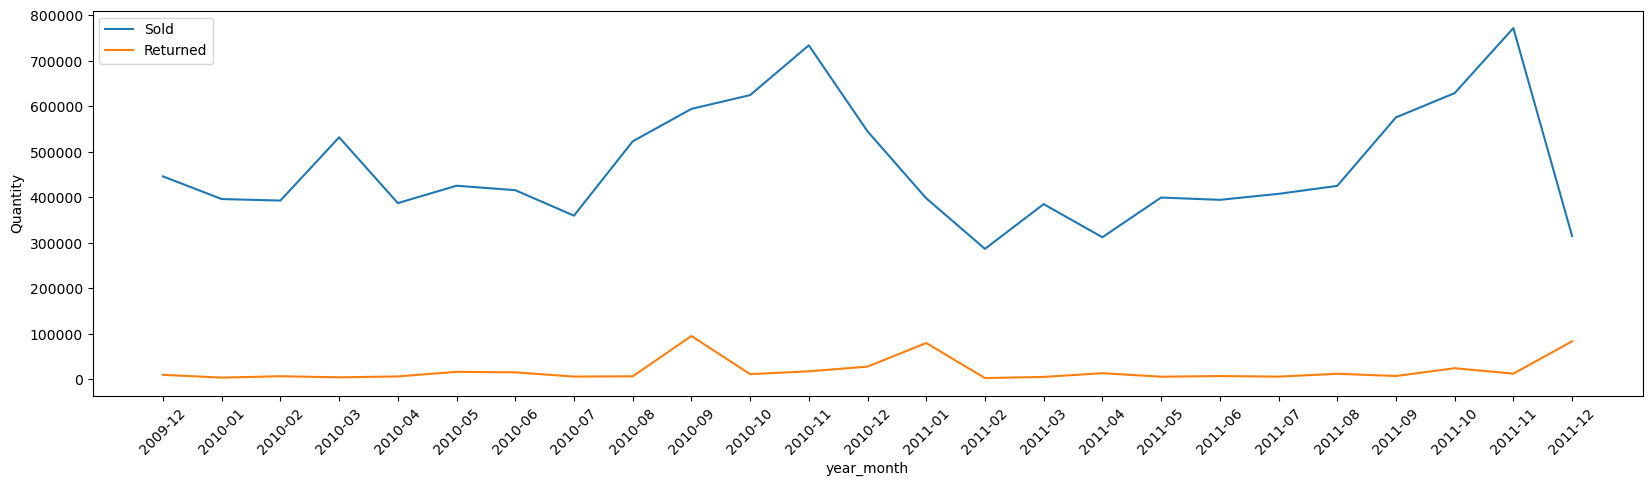

In [133]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
sns.lineplot(df.groupby('year_month')[['Quantity']].sum().reset_index(), x='year_month', y='Quantity', label='Sold')
sns.lineplot(df_cancelled.groupby('year_month')[['Quantity']].sum().reset_index(), x='year_month', y='Quantity', label='Returned')


As expected, the number of orders during the monts increases ast we get close to December in each year becuase of the holiday seasons. However, it is interesting to see that there is a sligh bump in the total orders in month March in 2010 and 2011.

In [83]:
df_cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [80]:
df_all['Cancelled'] = cancelled_mask
df_all.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False


Top 10 products in quantity sold

In [148]:
top_selling = df.groupby('Description')[['Quantity']].sum().sort_values('Quantity', ascending=False)[:10].reset_index()
top_selling

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,110249
1,WHITE HANGING HEART T-LIGHT HOLDER,96688
2,ASSORTED COLOUR BIRD ORNAMENT,81817
3,"PAPER CRAFT , LITTLE BIRDIE",80995
4,JUMBO BAG RED RETROSPOT,79285
5,MEDIUM CERAMIC TOP STORAGE JAR,78033
6,BROCADE RING PURSE,71440
7,PACK OF 60 PINK PAISLEY CAKE CASES,56794
8,60 TEATIME FAIRY CAKE CASES,54716
9,SMALL POPCORN HOLDER,49984


[Text(0, 0, '110249'),
 Text(0, 0, '96688'),
 Text(0, 0, '81817'),
 Text(0, 0, '80995'),
 Text(0, 0, '79285'),
 Text(0, 0, '78033'),
 Text(0, 0, '71440'),
 Text(0, 0, '56794'),
 Text(0, 0, '54716'),
 Text(0, 0, '49984')]

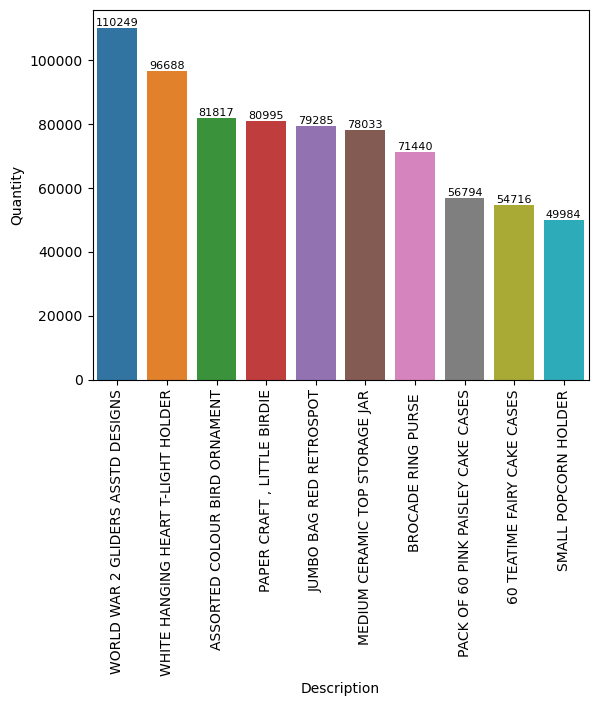

In [149]:
plt.xticks(rotation=90)
ax = sns.barplot(top_selling, x='Description', y='Quantity')
ax.bar_label(ax.containers[0], fontsize=8)

How many unique customers each country has?

In [126]:
df_all.groupby('Country')[['Customer ID']].nunique().sort_values('Customer ID', ascending=False)

,Customer ID
Country,
United Kingdom,5410
Germany,107
France,95
Spain,41
Belgium,29
Portugal,24
Netherlands,23
Switzerland,22
Sweden,19


Which Item was returned the most?

In [138]:
df_cancelled.groupby('Description')[['Quantity']].sum().sort_values('Quantity', ascending=False)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,74494
ROTATING SILVER ANGELS T-LIGHT HLDR,18750
SET/6 FRUIT SALAD PAPER CUPS,7140
SET/6 FRUIT SALAD PAPER PLATES,7008
...,...
MINT DINER WALL CLOCK,1
MINT GREEN ROSE TOWEL,1
MONTANA DIAMOND CLUSTER EARRINGS,1


In [139]:
df_all[df_all['Country'] == 'Hong Kong']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled
167607,505214,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
167608,505214,22385,JUMBO BAG SPACEBOY DESIGN,10,2010-04-21 10:04:00,1.95,NaN,Hong Kong,False
167609,505214,22382,LUNCH BAG SPACEBOY DESIGN,10,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
167610,505214,22551,PLASTERS IN TIN SPACEBOY,12,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
167611,505214,22242,"HOOK, 5 HANGER , MAGIC TOADSTOOL",12,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
...,...,...,...,...,...,...,...,...,...
949237,573154,22452,MEASURING TAPE BABUSHKA PINK,30,2011-10-28 08:20:00,2.95,NaN,Hong Kong,False
949238,573154,22492,MINI PAINT SET VINTAGE,36,2011-10-28 08:20:00,0.65,NaN,Hong Kong,False
949239,573154,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,8,2011-10-28 08:20:00,3.75,NaN,Hong Kong,False
990884,C576233,M,Manual,-1,2011-11-14 13:26:00,326.10,NaN,Hong Kong,True


<Axes: xlabel='year_month', ylabel='Price'>

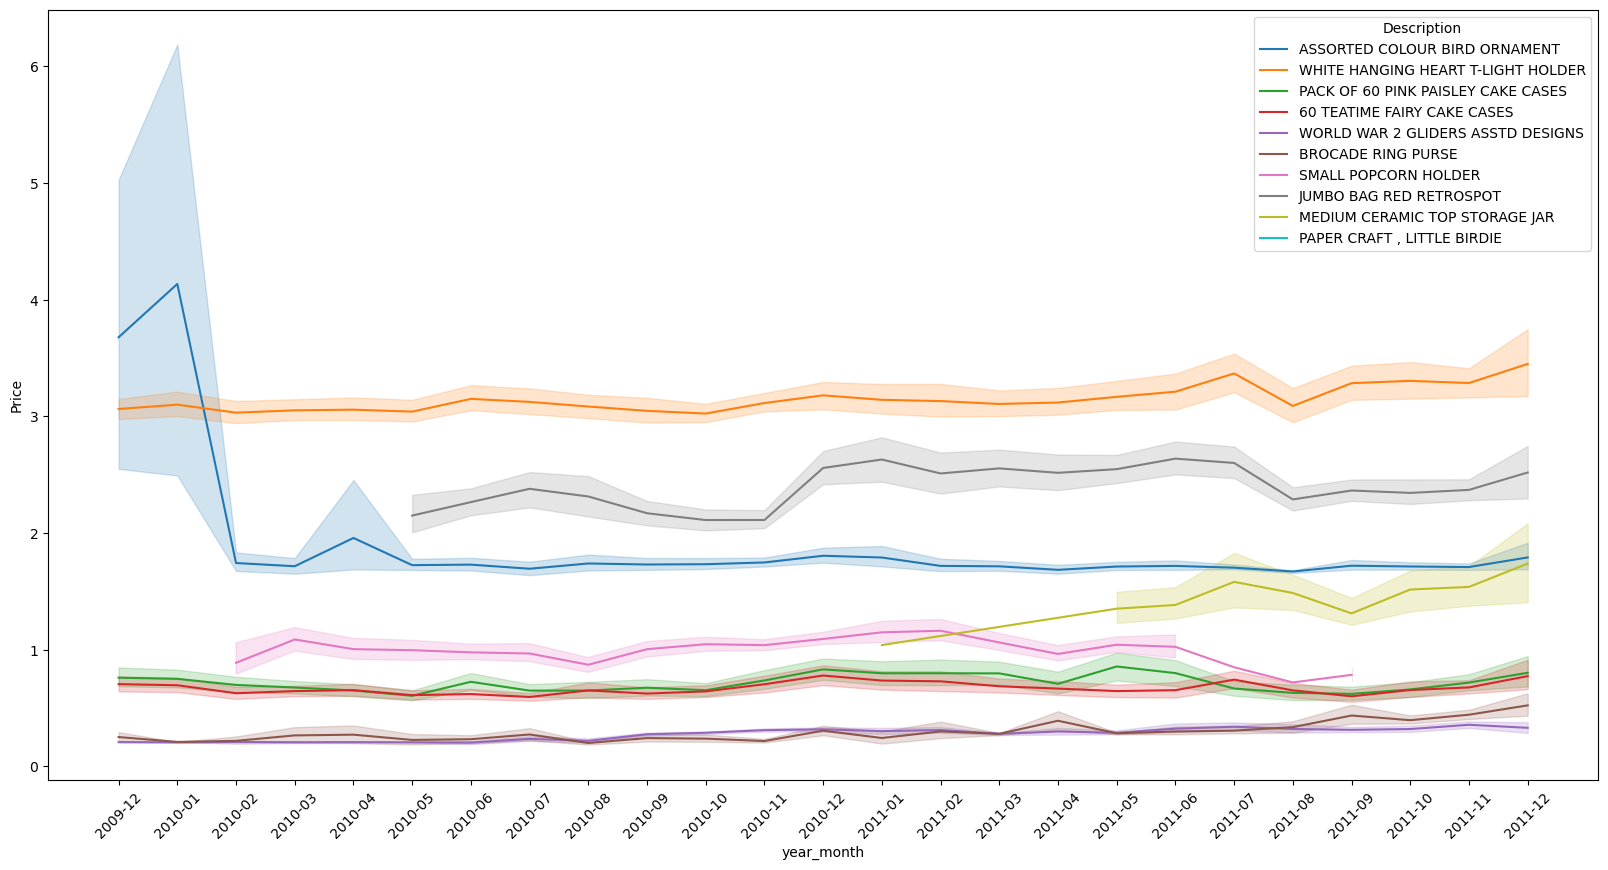

In [159]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
sns.lineplot(df[df['Description'].isin(top_selling.Description)], x='year_month', y='Price', hue='Description')


In [168]:
df[df['Description'].isin(top_selling.Description)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,year_month
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom,2009,12,2009-12
102,489442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2009-12-01 09:46:00,2.95,13635.0,United Kingdom,2009,12,2009-12
147,489446,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2009-12-01 10:06:00,2.55,13758.0,United Kingdom,2009,12,2009-12
210,489460,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2009-12-01 10:46:00,0.55,16167.0,United Kingdom,2009,12,2009-12
211,489460,84991,60 TEATIME FAIRY CAKE CASES,24,2009-12-01 10:46:00,0.55,16167.0,United Kingdom,2009,12,2009-12
...,...,...,...,...,...,...,...,...,...,...,...
1066162,581492,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2,2011-12-09 10:03:00,1.25,NaN,United Kingdom,2011,12,2011-12
1066562,581492,23166,MEDIUM CERAMIC TOP STORAGE JAR,2,2011-12-09 10:03:00,2.46,NaN,United Kingdom,2011,12,2011-12
1066836,581498,21977,PACK OF 60 PINK PAISLEY CAKE CASES,1,2011-12-09 10:26:00,2.08,NaN,United Kingdom,2011,12,2011-12
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,2011,12,2011-12


<Axes: xlabel='year_month', ylabel='Price'>

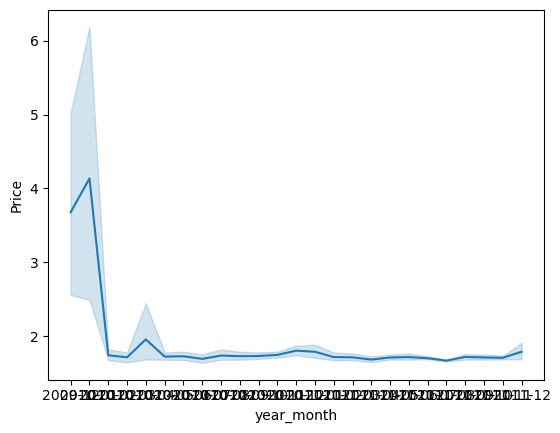

In [172]:
sns.lineplot(df[df['Description'] == 'ASSORTED COLOUR BIRD ORNAMENT'], x='year_month', y='Price')